# Traitement spatio-temporel des données hydrologiques en utilisant Python

## I - Time_series

#### I-1 Import Libraries

In [1]:
import pandas as pd # easy-to-use data structures like DataFrame and tools for handling and processing structured data.
import numpy as np # large, multi-dimensional arrays and matrices & mathematical functions to operate on these arrays. 
import matplotlib.pyplot as plt #2D plotting for interactive visualizations in a variety of formats.

#### I-2 Import data from excel files

The read_excel function is used to read data from an Excel file into a Pandas DataFrame.

Here is an example of how to read a specific sheet named "Sheet1" from an Excel file named "file.xlsx" using pandas.

In [2]:
pcp = pd.read_excel('Data.xlsx', sheet_name='Precipitation').set_index('Date')
flow = pd.read_excel('Data.xlsx', sheet_name='Flow').set_index('Date')

Display basic information about the DataFrame

In [7]:
pcp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9497 entries, 1991-01-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ST_P1   9497 non-null   float64
 1   ST_P2   7395 non-null   float64
 2   ST_P3   8401 non-null   float64
 3   ST_P4   8125 non-null   float64
 4   ST_P5   9497 non-null   float64
dtypes: float64(5)
memory usage: 445.2 KB


In [3]:
pcp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9497 entries, 1991-01-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ST_P1   9497 non-null   float64
 1   ST_P2   7395 non-null   float64
 2   ST_P3   8401 non-null   float64
 3   ST_P4   8125 non-null   float64
 4   ST_P5   9497 non-null   float64
dtypes: float64(5)
memory usage: 445.2 KB


Display the first or the last few rows of your DataFrame **Data** daljdazd

In [10]:
pcp.tail(2)

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
2016-12-30,0.0,NaN,0.0,NaN,0.0
2016-12-31,0.0,NaN,0.0,NaN,0.0


In [5]:
pcp.tail()

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
2016-12-27,0.0,NaN,0.0,NaN,0.0
2016-12-28,0.0,NaN,0.0,NaN,0.0
2016-12-29,0.0,NaN,0.0,NaN,0.0
2016-12-30,0.0,NaN,0.0,NaN,0.0
2016-12-31,0.0,NaN,0.0,NaN,0.0


#### I-3 DataFrame indexing

Time-based indexing: You can use boolean indexing based on date or time to select specific subsets of the data.

In [12]:
pcp2010=pcp[pcp.index > '2010-01-01']

In [14]:
pcp

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1991-01-01,0.0,NaN,NaN,NaN,0.0
1991-01-02,0.0,NaN,NaN,NaN,0.0
1991-01-03,0.0,NaN,NaN,NaN,0.0
1991-01-04,0.0,NaN,NaN,NaN,0.0
1991-01-05,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...
2016-12-27,0.0,NaN,0.0,NaN,0.0
2016-12-28,0.0,NaN,0.0,NaN,0.0
2016-12-29,0.0,NaN,0.0,NaN,0.0


In [13]:
pcp2010

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
2010-01-02,0.00,0.0,0.00,0.00,0.00
2010-01-03,0.00,0.0,0.00,0.00,0.00
2010-01-04,12.90,17.1,100.20,56.40,10.20
2010-01-05,1.50,32.7,28.65,51.90,3.75
2010-01-06,21.75,18.6,30.75,35.85,18.00
...,...,...,...,...,...
2016-12-27,0.00,NaN,0.00,NaN,0.00
2016-12-28,0.00,NaN,0.00,NaN,0.00
2016-12-29,0.00,NaN,0.00,NaN,0.00


<AxesSubplot:xlabel='Date'>

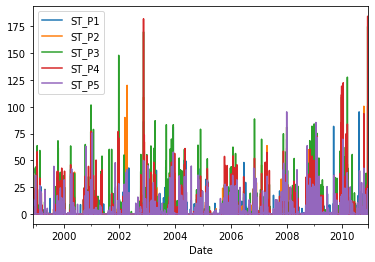

In [19]:
pcp.loc['12-01-1998':'12-05-2010'].plot()

In [21]:
pcp[['ST_P4','ST_P2']]

,ST_P4,ST_P2
Date,,
1991-01-01,NaN,NaN
1991-01-02,NaN,NaN
1991-01-03,NaN,NaN
1991-01-04,NaN,NaN
1991-01-05,NaN,NaN
...,...,...
2016-12-27,NaN,NaN
2016-12-28,NaN,NaN
2016-12-29,NaN,NaN


In [30]:
pcp.iloc[1:4,1:3]

,ST_P2,ST_P3
Date,,
1991-01-02,NaN,NaN
1991-01-03,NaN,NaN
1991-01-04,NaN,NaN


If you have a DataFrame containing time series data with a date index and you want to find the start and end dates of several variables in the DataFrame, you can use the idxmin() and idxmax() methods to find the earliest and latest dates for each variable. Here's an example:

In [32]:
pcp.idxmin()

ST_P1   1991-01-01
ST_P2   1995-01-02
ST_P3   1994-01-01
ST_P4   1993-01-03
ST_P5   1991-01-01
dtype: datetime64[ns]

In [34]:
pcp.max()

ST_P1     95.25
ST_P2    120.00
ST_P3    174.90
ST_P4    184.50
ST_P5     95.25
dtype: float64

In [12]:
pcp.idxmin().max()

Timestamp('1995-01-02 00:00:00')

#### I-4 Plotting

To plot a time series using Matplotlib in Python, you can use the plot() function from the pyplot module. Here is an example of how to plot a simple time series:

<AxesSubplot:xlabel='Date'>

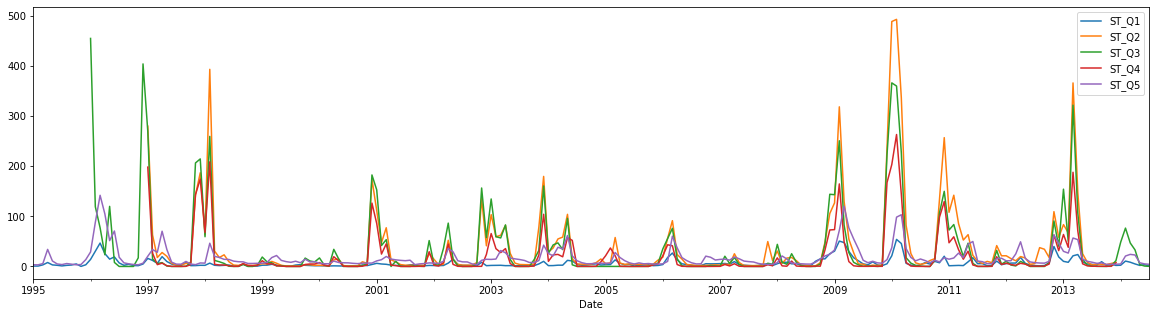

In [13]:
flow.plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

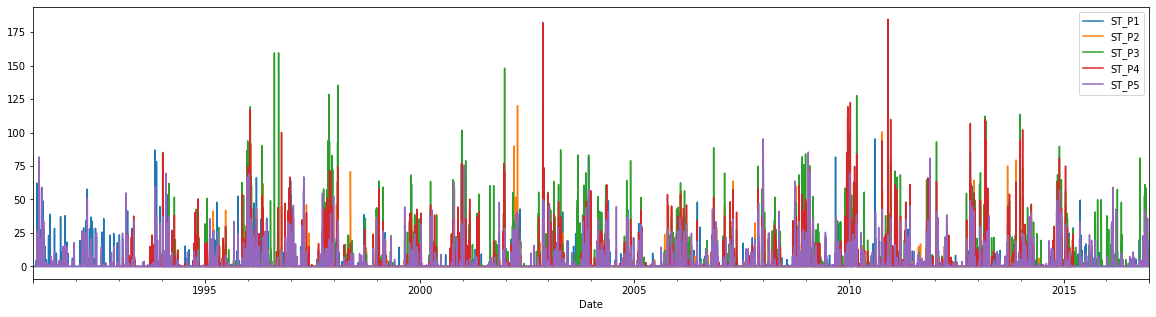

In [14]:
pcp.plot(figsize=(20,5))

In Matplotlib, the term "Axes" refers to the region of the image with the data space. When you create a plot using Matplotlib, you typically work with the Axes object to set various properties, customize the plot, and add elements like lines, markers, and labels.

Here's a brief explanation:

Figure: The entire figure or window that everything is drawn on.

Axes: The region of the figure that displays your data. You can think of it as a subplot or a plot within the plot.


When you create a plot using Matplotlib, you often get both a Figure and one or more Axes objects. The Axes object is commonly referred to as ax for short.

Here's a simple example:

In [46]:
pcp['ST_P2'].idxmax()

Timestamp('2002-04-13 00:00:00')

(9132.0, 11790.0)

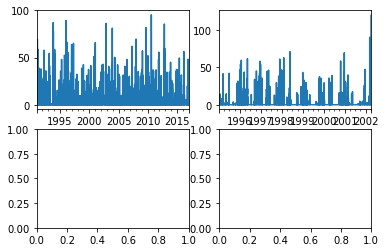

In [48]:
fig, ax=plt.subplots(2,2)

pcp['ST_P1'].plot(ax=ax[0,0])
pcp['ST_P2'].plot(ax=ax[0,1])
ax[0,1].set_xlim([pcp['ST_P2'].idxmin(),pcp['ST_P2'].idxmax()])


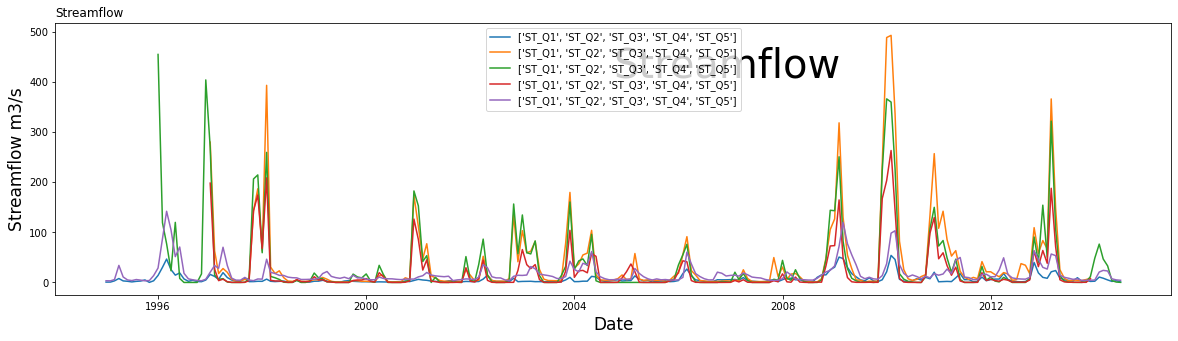

In [59]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(flow.index, flow, label=list(flow))
ax.set_ylabel('Streamflow m3/s', fontsize=17)
ax.set_xlabel('Date', fontsize=17)

ax.set_title('Streamflow', loc='left')
ax.text(0.5, 0.8,transform=ax.transAxes, s='Streamflow', color='black', fontsize=40)
ax.legend()

In [58]:
list(flow)

['ST_Q1', 'ST_Q2', 'ST_Q3', 'ST_Q4', 'ST_Q5']

<AxesSubplot:xlabel='Date'>

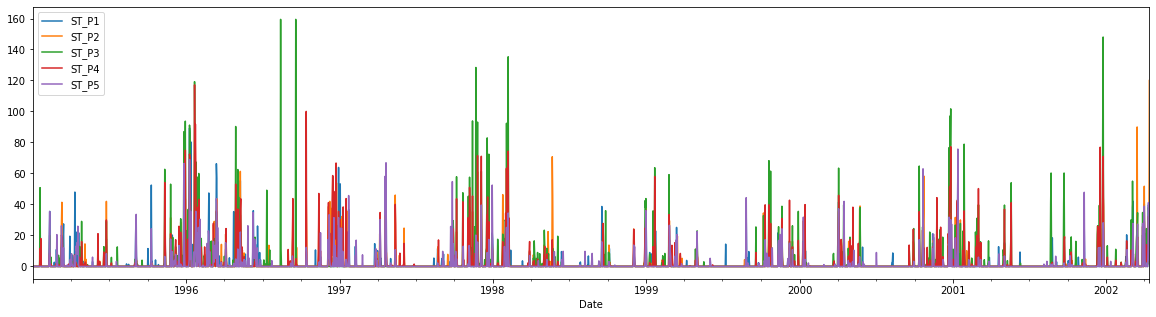

In [16]:
start_date = pcp.idxmin().max()
end_date = pcp.idxmax().min()
pcp_common_period = pcp.loc[start_date:end_date]
pcp_common_period.plot(figsize=(20,5))

Time-based aggregations: You can use the resample() function from Pandas to perform time-based aggregations such as calculating the mean or sum of the data for specific time intervals.

In [67]:
pcp.resample('Y').sum().to_excel('precipi_ann.xlsx')

<AxesSubplot:xlabel='Date'>

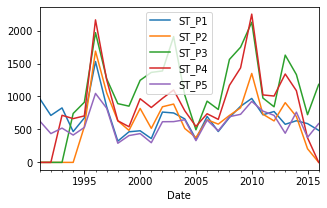

In [68]:
pcp.resample('YS').sum().plot(figsize=(5,3))

Text(0, 0.5, 'Yearly maxima (mm)')

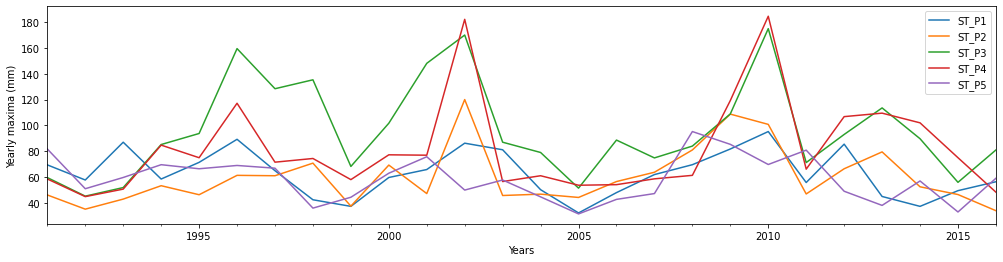

In [46]:
#Gather the maximum rainfall for each year
data_ymax=pcp_filled_df.resample('Y').max()
data_ymax.plot(figsize=(17,4))
plt.xlabel('Years')
plt.ylabel('Yearly maxima (mm)')

#### I-5 Descriptive statistics

In pandas, there are various statistical functions that you can apply to a DataFrame or Series. Some of the commonly used functions include:

mean(): Calculates the mean (average) of each column.

max(): Returns the maximum value for each column.

min(): Returns the minimum value for each column.

sum(): Calculates the sum of values for each column.

std(): Computes the standard deviation of each column.

var(): Calculates the variance of each column.

count(): Returns the number of non-null values for each column.

median(): Computes the median of each column.

quantile(q): Calculates the qth quantile of each column.

describe(): Generates descriptive statistics for each column (count, mean, std, min, 25%, 50%, 75%, max).

abs(): Computes the absolute numeric value of each element.

In [69]:
pcp.describe()

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
count,9497.000000,7395.000000,8401.000000,8125.000000,9497.000000
mean,1.855897,2.115578,3.322837,2.824375,1.598321
std,6.924467,7.702481,11.687330,10.090844,6.205594
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.250000,120.000000,174.900000,184.500000,95.250000


#### I-6 Missing values

Missing values, often denoted as NaN (Not a Number) in numerical datasets or as null values in other contexts, are values that are not present in a dataset where you would expect them to be. Handling missing values is a crucial step in the data preprocessing phase, as they can impact the results of your analysis or machine learning models.


**Causes of Missing Values:**

Random Missingness: Values are missing at random.

Systematic Missingness: There's a pattern to when values are missing.

Missing Completely at Random (MCAR): The pattern of missingness is unrelated to any variable.

Missing at Random (MAR): The pattern of missingness is related to some observed data.

Missing Not at Random (MNAR): The pattern of missingness is related to the missing values themselves.

You can count NaN (Not a Number) values in a Pandas DataFrame using the isna() or isnull() method along with the sum() method.

In [74]:
pcp.isna().sum()/len(pcp)*100

ST_P1     0.000000
ST_P2    22.133305
ST_P3    11.540486
ST_P4    14.446667
ST_P5     0.000000
dtype: float64

In [72]:
len(pcp)

9497

In [20]:
pcp.isnull()

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1991-01-01,False,True,True,True,False
1991-01-02,False,True,True,True,False
1991-01-03,False,True,True,True,False
1991-01-04,False,True,True,True,False
1991-01-05,False,True,True,True,False
...,...,...,...,...,...
2016-12-27,False,True,False,True,False
2016-12-28,False,True,False,True,False
2016-12-29,False,True,False,True,False


In [21]:
pcp.isna().sum()/len(pcp)*100

ST_P1     0.000000
ST_P2    22.133305
ST_P3    11.540486
ST_P4    14.446667
ST_P5     0.000000
dtype: float64

***Handling Missing Values:***

**Imputation: Replace missing values with estimated values.**

Mean, median, or mode imputation for numerical variables.

Forward fill or backward fill for time series data.

Predictive modeling (using machine learning models) for more complex imputation.

**Deletion: Remove missing values.**

Listwise deletion (remove entire rows with missing values).

Pairwise deletion (use available data for each calculation).

**Special Values: Use a specific value to denote missingness.**

For example, in some datasets, a value like -999 or NaN is used to represent missing data.

In [78]:
pcp.dropna()

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1995-01-01,0.0,10.8,31.8,16.8,0.0
1995-01-02,0.0,0.0,0.0,0.0,0.0
1995-01-03,0.0,0.0,0.0,0.0,0.0
1995-01-04,0.0,0.0,0.0,0.0,0.0
1995-01-05,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2015-03-27,0.0,0.0,0.0,0.0,0.0
2015-03-28,0.0,0.0,0.0,0.0,0.0
2015-03-29,0.0,0.0,0.0,0.0,0.0


In [79]:
pcp.fillna(pcp.mean())

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1991-01-01,0.0,2.115578,3.322837,2.824375,0.0
1991-01-02,0.0,2.115578,3.322837,2.824375,0.0
1991-01-03,0.0,2.115578,3.322837,2.824375,0.0
1991-01-04,0.0,2.115578,3.322837,2.824375,0.0
1991-01-05,0.0,2.115578,3.322837,2.824375,0.0
...,...,...,...,...,...
2016-12-27,0.0,2.115578,0.000000,2.824375,0.0
2016-12-28,0.0,2.115578,0.000000,2.824375,0.0
2016-12-29,0.0,2.115578,0.000000,2.824375,0.0


Use the dropna() method to remove rows or columns containing missing values.

In [22]:
pcp.dropna(axis=0)

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1995-01-01,0.0,10.8,31.8,16.8,0.0
1995-01-02,0.0,0.0,0.0,0.0,0.0
1995-01-03,0.0,0.0,0.0,0.0,0.0
1995-01-04,0.0,0.0,0.0,0.0,0.0
1995-01-05,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2015-03-27,0.0,0.0,0.0,0.0,0.0
2015-03-28,0.0,0.0,0.0,0.0,0.0
2015-03-29,0.0,0.0,0.0,0.0,0.0


Use the fillna() method to fill missing values with a specific value or a calculated value (e.g., mean, median).

In [23]:
# Fill missing values with a specific value
pcp.fillna(value=1000)

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1991-01-01,0.0,1000.0,1000.0,1000.0,0.0
1991-01-02,0.0,1000.0,1000.0,1000.0,0.0
1991-01-03,0.0,1000.0,1000.0,1000.0,0.0
1991-01-04,0.0,1000.0,1000.0,1000.0,0.0
1991-01-05,0.0,1000.0,1000.0,1000.0,0.0
...,...,...,...,...,...
2016-12-27,0.0,1000.0,0.0,1000.0,0.0
2016-12-28,0.0,1000.0,0.0,1000.0,0.0
2016-12-29,0.0,1000.0,0.0,1000.0,0.0


In [24]:
# Fill missing values with the mean of each column
pcp.fillna(pcp.mean())

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
Date,,,,,
1991-01-01,0.0,2.115578,3.322837,2.824375,0.0
1991-01-02,0.0,2.115578,3.322837,2.824375,0.0
1991-01-03,0.0,2.115578,3.322837,2.824375,0.0
1991-01-04,0.0,2.115578,3.322837,2.824375,0.0
1991-01-05,0.0,2.115578,3.322837,2.824375,0.0
...,...,...,...,...,...
2016-12-27,0.0,2.115578,0.000000,2.824375,0.0
2016-12-28,0.0,2.115578,0.000000,2.824375,0.0
2016-12-29,0.0,2.115578,0.000000,2.824375,0.0


Imputation involves estimating missing values based on the available data. Libraries like scikit-learn provide imputation methods. 

SimpleImputer replaces missing values using a descriptive statistic along each column, or using a constant value.

SimplerInputer(missing_values, strategy or fill_value)


missing_values :int, float, str, np.nan, None or pandas.NA, default=np.nan 
strategy : mean, median or most frequent
fill_value : str or numerical value

In [25]:
from sklearn.impute import SimpleImputer

# Create an imputer with a specific strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it
pcp_filled_df= pd.DataFrame(imputer.fit_transform(pcp.values), columns=pcp.columns)

In Python, you can use the IterativeImputer class from the sklearn.impute module to fill gaps in precipitation data using the MICE (Multivariate Imputation by Chained Equations) method. 

MICE Imputation is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.

It is currently under experimental implementation in Python via `sklearn` package’s `IterativeImputer`. `fancyimpute` is another nice package that implements this.

Here is a quick intuition: 

1. You basically take the variable that contains missing values as a response ‘Y’ and other variables as predictors ‘X’.

2. Build a model with rows where Y is not missing.

3. Then predict the missing observations.

Do this multiple times by doing random draws of the data and taking the mean of the predictions.

For more detail refer to : https://www.machinelearningplus.com/machine-learning/mice-imputation/



Here is an example of how to use the IterativeImputer class to fill gaps in precipitation data:

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Create an instance of the IterativeImputer class with a random forest regressor
imputer = IterativeImputer(random_state=100, max_iter=500)

# Fit the imputer to the precipitation data
imputer.fit(pcp)

# Use the imputer to fill the missing values
pcp_filled_df=pd.DataFrame(imputer.transform(pcp), columns=pcp.columns)

In [27]:
pcp_filled_df

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
0,0.0,0.946520,1.926476,1.396443,0.0
1,0.0,0.946520,1.926476,1.396443,0.0
2,0.0,0.946520,1.926476,1.396443,0.0
3,0.0,0.946520,1.926476,1.396443,0.0
4,0.0,0.946520,1.926476,1.396443,0.0
...,...,...,...,...,...
9492,0.0,0.323318,0.000000,0.267981,0.0
9493,0.0,0.323318,0.000000,0.267981,0.0
9494,0.0,0.323318,0.000000,0.267981,0.0
9495,0.0,0.323318,0.000000,0.267981,0.0


This will use a random forest regressor with 100 trees to predict the missing values in the precipitation data based on the other variables in the dataset.

Note that, this method can be computationally expensive and may take some time to run, depending on the size of your dataset. Also, it's good to keep in mind that, as with any imputation method, the imputed values are not real observations and may introduce bias to your analysis. So, it's important to keep track of the imputed values and take that into account when interpreting the results.

<AxesSubplot:xlabel='Date'>

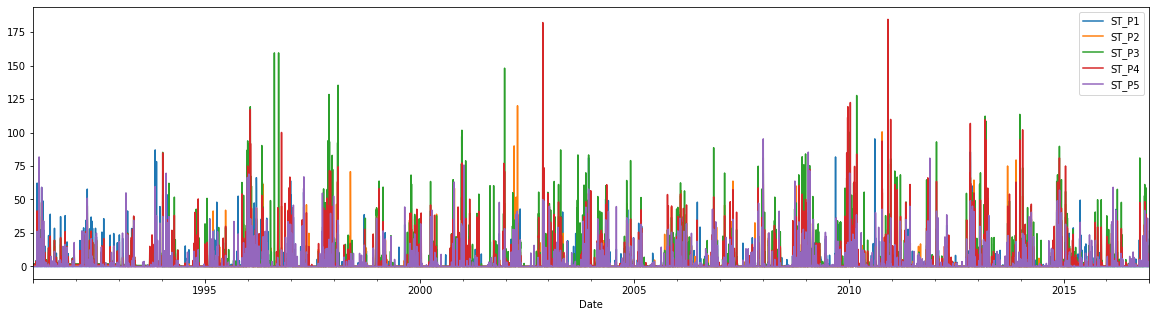

In [28]:
pcp_filled_df.index=pcp.index
pcp_filled_df.plot(figsize=(20,5))

#### I-7 Regression

Regression searches for relationships among variables. 

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. 

Regression is also useful when you want to forecast a response using a new set of predictors.

Regression is used in many different fields, including hydrology, economics, computer science, and the social sciences. Its importance rises every day with the availability of large amounts of data and increased awareness of the practical value of data.

**linear regression**

Linear regression is probably one of the most important and widely used regression techniques. 


When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.


The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱, using the particular regression model. A larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

The value 𝑅² = 1 corresponds to SSR = 0. That’s the perfect fit, since the values of predicted and actual responses fit completely to each other.

***Simple Linear Regression***


Simple or single-variate linear regression is the simplest case of linear regression, as it has a single independent variable, 𝐱 = 𝑥.

***Multiple Linear Regression***

Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.

***Polynomial Regression***

You can regard polynomial regression as a generalized case of linear regression. You assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function.

In other words, in addition to linear terms like 𝑏₁𝑥₁, your regression function 𝑓 can include nonlinear terms such as 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂.

The simplest example of polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree two: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

In [29]:
from sklearn.linear_model import LinearRegression

#First step: Define variables

x=pcp['ST_P1'].values.reshape((-1, 1))
y=pcp['ST_P5'].values

#Second step:  create a linear regression model and fit it using the existing data.

model = LinearRegression().fit(x, y)

In [30]:
#You can obtain the coefficient of determination, 𝑅², with .score() called on mode
#When you’re applying .score(), the arguments are also the predictor x and response y, and the return value is 𝑅².

model.score(x,y)

0.6257946795867388

In [31]:
# To obtain pearon coefficient R we could use square root of the determination
np.sqrt(model.score(x,y))

0.7910718548821838

In [32]:
#The attributes of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁:
model.coef_   #Slope
model.intercept_   #Intersept

0.2825907974800761

Tips : Compute pairwise correlation of columns, excluding NA/null values using df.corr() function 


method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

In [33]:
pcp.corr('pearson')

,ST_P1,ST_P2,ST_P3,ST_P4,ST_P5
ST_P1,1.000000,0.518109,0.422992,0.496812,0.791072
ST_P2,0.518109,1.000000,0.633906,0.772445,0.468950
ST_P3,0.422992,0.633906,1.000000,0.767079,0.388191
ST_P4,0.496812,0.772445,0.767079,1.000000,0.448965
ST_P5,0.791072,0.468950,0.388191,0.448965,1.000000


Once you have a satisfactory model, then you can use it for predictions with either existing or new data. To obtain the predicted response, use .predict():

In [34]:
y_pred = model.predict(x)
y_pred
# plt.plot(y_pred, x)

array([0.2825908, 0.2825908, 0.2825908, ..., 0.2825908, 0.2825908,
       0.2825908])

In [39]:
#Or I can use the equation

model.coef_*np.array(x) + model.intercept_

array([[0.2825908],
       [0.2825908],
       [0.2825908],
       ...,
       [0.2825908],
       [0.2825908],
       [0.2825908]])

Here is an example of how to plot a scatter plot of x and y.

In order to plot a correlation line on a scatter plot in Python, you can use the polyfit() function from the numpy package to calculate the slope and intercept of the line of best fit and then use the plot() method of the ax object to plot the line.

In order to add the correlation coefficient on a scatter plot in Python, you can use the numpy.corrcoef() function to calculate the correlation coefficient between x and y and then use the text() method of the ax object to add the coefficient as text on the plot.

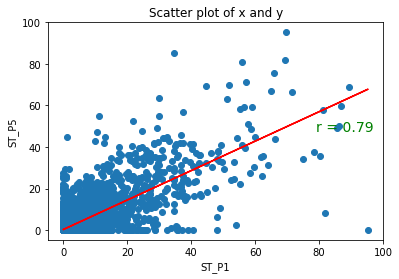

In [40]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot a scatter plot of x and y
ax.scatter(x, y)

# Calculate the slope and intercept of the line of best fit
model =  LinearRegression().fit(x, y)


slope = model.coef_
intercept = model.intercept_

# Plot the line of best fit
# ax.plot(x, slope*np.array(x) + intercept, color='red')
ax.plot(x, model.predict(x), color='red')

# Calculate the correlation coefficient R
corr_coef = np.sqrt(model.score(x,y))


# Add the correlation coefficient as text on the plot
ax.text(0.8, 0.5, f'r = {corr_coef:.2f}', transform=ax.transAxes, fontsize=14, color='green')



# Add labels and a title
ax.set_xlabel('ST_P1')
ax.set_ylabel('ST_P5')
ax.set_title('Scatter plot of x and y')

# Show the plot
plt.show()

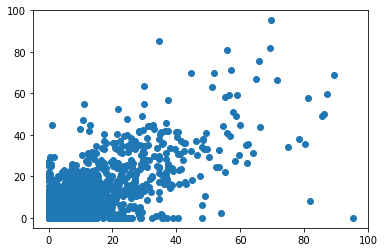

In [83]:
plt.scatter(pcp['ST_P1'],pcp['ST_P5'])

#### I-8 Resample and groupby 

To plot the monthly average distribution of precipitation from a continuous time series in Python, you can first use the resample() method to resample the data to the monthly level, then use the groupby() method to group the data by month, and finally use the mean() method to calculate the average precipitation for each month. You can then use the plot() method of the DataFrame or Series object to plot the data.

To plot the monthly average distribution of precipitation from a continuous time series starting from September to August, you can reorder the dataframe or series so that September is the first month and August is the last month using the reindex() method.

The example will create a bar plot of the monthly average precipitation data, starting from September to August, using the kind='bar' option in the plot() method. You can adjust the x-axis label, y-axis label, and title of the plot as desired.

You can also use other types of plots like line plot, area plot etc depending on the need and data availability.

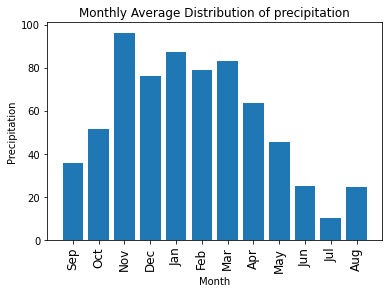

In [41]:

# resample to monthly level
monthly_data = pcp_filled_df.resample('M').sum()

#group by month
monthly_data['month'] = monthly_data.index.month
monthly_data_monthly = monthly_data.groupby('month')['ST_P1'].mean()

# Reorder the dataframe so that September is the first month and August is the last month
monthly_data_monthly = monthly_data_monthly.reindex(index = [9,10,11,12,1,2,3,4,5,6,7,8])


# Create a figure and an axis
fig, ax = plt.subplots()

# plot bar chart
ax.bar(np.arange(0,12,1), monthly_data_monthly.values)

# Add labels and a title
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation')
ax.set_title('Monthly Average Distribution of precipitation')
ax.set_xticks(np.arange(0,12,1))
ax.set_xticklabels(['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'], fontsize=12,
                  rotation=90)
# Show the plot
plt.show()

### I-9 Histogram

A histogram is a graphical representation of the distribution of data using bars of different heights to represent the frequency of each value. In Python, you can create a histogram using built-in functions like matplotlib or seaborn. For example, to create a histogram using matplotlib, you can use the hist() function, which takes an array or list of data as input. You can also customize the histogram by adjusting the number of bins, the bin width, and the colors of the bars.

<AxesSubplot:>

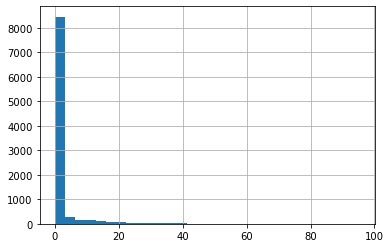

In [42]:
pr=pcp_filled_df['ST_P1']

pr.hist(bins=30)

In [43]:
#Remove 0 from the list to get a better presentation

<AxesSubplot:>

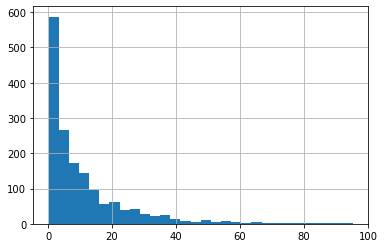

In [44]:
pr[pr>0].hist(bins=30)

<AxesSubplot:>

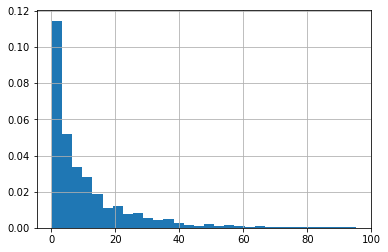

In [45]:
pr[pr>0].hist(bins=30, density =True)

### I-10 Analysis of Extreme Rainfall Events


Fitting a probability distribution to your time series data involves finding the parameters of a distribution that best describe the observed data. Here, I'll outline a general approach to fit your daily precipitation data to normal, Weibull, and Gumbel distributions using Python. I'll use the scipy.stats module, which provides functions for working with probability distributions.

In [47]:
#In Python, you can define a function using the def keyword, followed by the function name, 
#parameters (if any), a colon (:), and then the function body.


def myfrstfunc(a, b):
    c=a+b
    return c


myfrstfunc(5,9)

14

In [48]:
from scipy.stats import norm, weibull_min, gumbel_r
from scipy.optimize import curve_fit

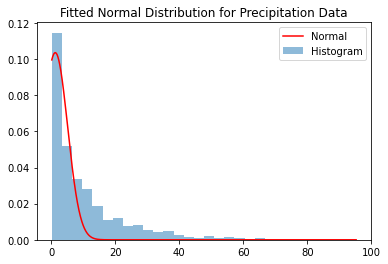

In [49]:
data=pr[pr>0]

# Create a histogram to represent the empirical PDF
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Define the normal distribution function
def normal_distribution(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Fit data to Normal distribution
params_normal, cov_normal = curve_fit(normal_distribution, bin_centers, hist)

# Generate x values for the fitted Normal distribution
x_normal = np.linspace(min(data), max(data), 1000)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')

# Plot the fitted Normal distribution
plt.plot(x_normal, normal_distribution(x_normal, *params_normal), 'red', label='Normal')

plt.title('Fitted Normal Distribution for Precipitation Data')
plt.legend()
plt.show()

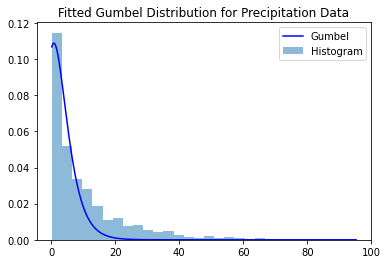

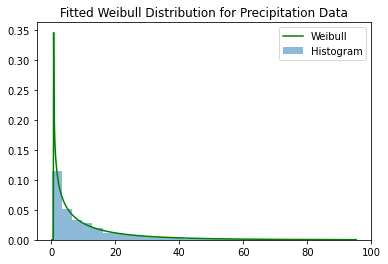

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_min
from scipy.optimize import curve_fit

data=pr[pr>0]

# Create a histogram to represent the empirical PDF
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Define the Gumbel distribution function
def gumbel_distribution(x, loc, scale):
    return gumbel_r.pdf(x, loc=loc, scale=scale)

# Fit data to Gumbel distribution
params_gumbel, cov_gumbel = curve_fit(gumbel_distribution, bin_centers, hist)

# Generate x values for the fitted Gumbel distribution
x_gumbel = np.linspace(min(data), max(data), 1000)

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')

# Plot the fitted Gumbel distribution
plt.plot(x_gumbel, gumbel_distribution(x_gumbel, *params_gumbel), 'b-', label='Gumbel')

plt.title('Fitted Gumbel Distribution for Precipitation Data')
plt.legend()
plt.show()

# Define the Weibull distribution function
def weibull_distribution(x, c, loc, scale):
    return weibull_min.pdf(x, c, loc=loc, scale=scale)

# Fit data to Weibull distribution
# Ensure that the data contains only positive values for Weibull distribution
positive_data = data[data > 0]
hist_weibull, bin_edges_weibull = np.histogram(positive_data, bins=30, density=True)
bin_centers_weibull = 0.5 * (bin_edges_weibull[:-1] + bin_edges_weibull[1:])
params_weibull, cov_weibull = curve_fit(weibull_distribution, bin_centers_weibull, hist_weibull)

# Generate x values for the fitted Weibull distribution
x_weibull = np.linspace(min(positive_data), max(positive_data), 1000)

# Plot the histogram of the data
plt.hist(positive_data, bins=30, density=True, alpha=0.5, label='Histogram')

# Plot the fitted Weibull distribution
plt.plot(x_weibull, weibull_distribution(x_weibull, *params_weibull), 'g-', label='Weibull')

plt.title('Fitted Weibull Distribution for Precipitation Data')
plt.legend()
plt.show()

Choosing the best fit among different distributions involves comparing their goodness of fit. There are several statistical measures and visual diagnostics that can help you assess the quality of the fits. Here are some common approaches:

Visual Inspection:

Histogram and Fitted Curve: Compare the histograms of your data with the fitted probability density functions (PDFs) for each distribution. The curve that visually aligns with the histogram is a good indication.

Statistical Tests:

Kolmogorov-Smirnov Test: This test compares the cumulative distribution function (CDF) of the data with the theoretical distribution. The smaller the p-value, the less likely the distribution fits the data.

In [51]:
from scipy.stats import kstest

# kstest returns a D statistic and a p-value
ks_statistic_normal, p_value_normal = kstest(data, 'norm', args=params_normal)
ks_statistic_gumbel, p_value_gumbel = kstest(data, 'gumbel_r', args=params_gumbel)
ks_statistic_weibull, p_value_weibull = kstest(positive_data, 'weibull_min', args=params_weibull)
print(ks_statistic_normal,ks_statistic_gumbel,ks_statistic_weibull)

0.39877901886882877 0.3126744957755725 0.0983910891089109


Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC): These criteria penalize models with more parameters. Lower values indicate a better fit.

In [52]:
n = len(data)
k_normal = len(params_normal)
k_gumbel = len(params_gumbel)
k_weibull = len(params_weibull)

aic_normal = n * np.log(2 * np.pi) + n + 2 * k_normal
bic_normal = n * np.log(2 * np.pi) + n + np.log(n) * k_normal

aic_gumbel = n * np.log(2 * np.pi) + n + 2 * k_gumbel
bic_gumbel = n * np.log(2 * np.pi) + n + np.log(n) * k_gumbel

aic_weibull = n * np.log(2 * np.pi) + n + 2 * k_weibull
bic_weibull = n * np.log(2 * np.pi) + n + np.log(n) * k_weibull

print(aic_normal, aic_gumbel, bic_weibull)

4590.009339317502 4590.009339317502 4608.172467034745


Quantile-Quantile (Q-Q) Plots:

Plot the quantiles of the data against the quantiles of the theoretical distribution. A straight line indicates a good fit.

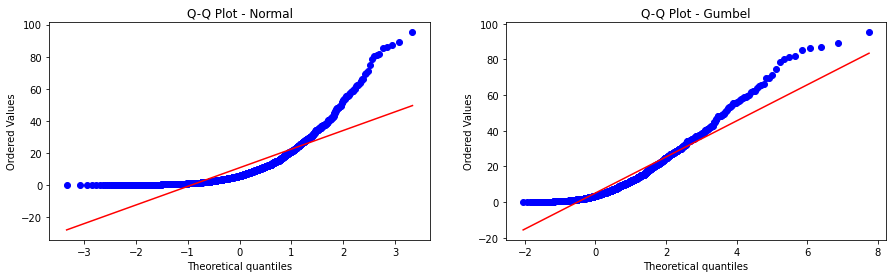

In [53]:
from scipy.stats import probplot

_, ax = plt.subplots(1, 2, figsize=(15, 4))

probplot(data, dist='norm', plot=ax[0])
ax[0].set_title('Q-Q Plot - Normal')

probplot(data, dist='gumbel_r', plot=ax[1])
ax[1].set_title('Q-Q Plot - Gumbel')

plt.show()

Calculating return levels involves determining the precipitation value associated with a specific return period. The return level is often estimated using the inverse of the cumulative distribution function (CDF) of the fitted distribution.


To calculate the return levels for a given array of return periods using the best-fit parameters for the normal distributionn, we'll use the mentioned parameters (mu and sigma) and assume return periods of [2, 5, 10, 30, 50]:

In [54]:
# Estimate the mean and standard deviation from your data
mu_estimated = np.mean(data)
sigma_estimated = np.std(data)

# Specify the return periods
return_periods = [2, 5, 10, 30, 50]

# Calculate return levels using the estimated parameters
return_levels_normal = norm.ppf(1 - 1 / np.array(return_periods), mu_estimated, sigma_estimated)

# Print the results
for period, level in zip(return_periods, return_levels_normal):
    print(f"Return Period: {period} years, Return Level: {level:.2f}")

Return Period: 2 years, Return Level: 10.91
Return Period: 5 years, Return Level: 22.29
Return Period: 10 years, Return Level: 28.25
Return Period: 30 years, Return Level: 35.72
Return Period: 50 years, Return Level: 38.69


to calculate return levels for a Gumbel distribution, you can follow a similar approach

In [55]:
# Estimate the location and scale parameters from your data
loc_estimated, scale_estimated = gumbel_r.fit(data)

# Specify the return periods
return_periods = [2, 5, 10, 30, 50]

# Calculate return levels using the estimated parameters
return_levels_gumbel = gumbel_r.ppf(1 - 1 / np.array(return_periods), loc_estimated, scale_estimated)

# Print the results
for period, level in zip(return_periods, return_levels_gumbel):
    print(f"Return Period: {period} years, Return Level: {level:.2f}")

Return Period: 2 years, Return Level: 8.48
Return Period: 5 years, Return Level: 16.86
Return Period: 10 years, Return Level: 22.41
Return Period: 30 years, Return Level: 30.80
Return Period: 50 years, Return Level: 34.63


To calculate return levels for a weibull distribution, you can follow a similar approach

In [56]:
# Estimate the shape, location, and scale parameters from your data
c_estimated, loc_estimated, scale_estimated = weibull_min.fit(data)

# Specify the return periods
return_periods = [2, 5, 10, 30, 50]

# Calculate return levels using the estimated parameters
return_levels_weibull = weibull_min.ppf(1 - 1 / np.array(return_periods), c_estimated, loc_estimated, scale_estimated)

# Print the results
for period, level in zip(return_periods, return_levels_weibull):
    print(f"Return Period: {period} years, Return Level: {level:.2f}")

Return Period: 2 years, Return Level: 6.02
Return Period: 5 years, Return Level: 17.23
Return Period: 10 years, Return Level: 27.04
Return Period: 30 years, Return Level: 44.24
Return Period: 50 years, Return Level: 52.79


We have daily  precipitation data. We want to perform extreme events analysis and calculate the return levels associated with 2, 10, 25, 50, and 100 years events. 


#Gather the maximum rainfall for each year


Suppose we are going to fit a GEV distribution for extreme events analysis, 

In probability theory and statistics, the generalized extreme value distribution is a family of continuous probability distributions developed within extreme value theory to combine the Gumbel, Fréchet and Weibull families.


Equation: The cumulative distribution function (CDF) of the GEV distribution is

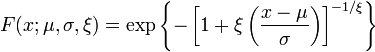
where three parameters, ξ, μ and σ represents a shape, location, and scale of the distribution function, respectively.



In [57]:
from scipy.stats import genextreme


# Convert the yearly maxima data to a numpy array
data_array = pcp_filled_df.resample('Y').max()['ST_P1'].values

# Fit a GEV distribution to the data
params = genextreme.fit(data_array)

# Retrieve the parameters of the fitted GEV distribution
shape, loc, scale = params

# Compute the return levels for several return periods. 
return_periods = np.array([2, 5, 10, 20, 50, 100])

# For this we are going to use Inverse survival function in genextreme
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

return_levels

array([63.18506497, 77.86432725, 85.05370004, 90.51590259, 95.96636641,
       99.11616688])

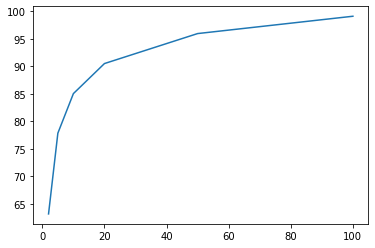

In [58]:
plt.plot(return_periods, return_levels)

### I-11 Trend analysis

In [59]:
import pymannkendall as mk

data_y=pcp_filled_df.resample('Y').sum()['ST_P1']

Trend=mk.original_test(data_y)

Text(0.55, 0.8, 'Sen Slope = -4.583')

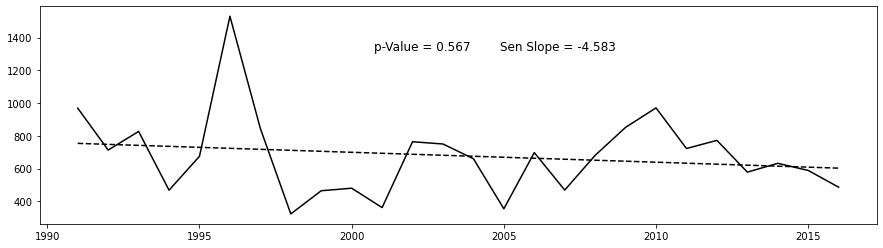

In [60]:
fig , ax= plt.subplots(figsize=(15,4))

ax.plot(data_y.index.year, data_y, color="black",label='ST_P1')

x=np.arange(0, len(data_y))
Z = np.polyfit(x, data_y, 1)
P = np.poly1d(Z)
ax.plot(data_y.index.year,P(x),"--", color='black', label='Trend of yearly rainfall')

ax.text(0.4, 0.8,transform=ax.transAxes, s='p-Value = {0:.3f}'.format(Trend.p), fontsize=12, color='Black')
ax.text(0.55, 0.8,transform=ax.transAxes, s='Sen Slope = {0:.3f}'.format(Trend.slope),fontsize=12, color='Black')


# II- Spatial data

In [2]:
import geopandas as gpd
from matplotlib import pyplot as plt

Read a shapefile
To read a shapefile using the geopandas (gpd) library, you can use the read_file() function. This function takes the file path of the shapefile as an input, and returns a GeoDataFrame object containing the data from the shapefile.

Here is an example of how to read a shapefile using geopandas:

In [3]:
# read shapefile
river = gpd.read_file('SHP/rivers.shp')
sub = gpd.read_file('SHP/subbasins.shp')
basin = gpd.read_file('SHP/basin.shp')

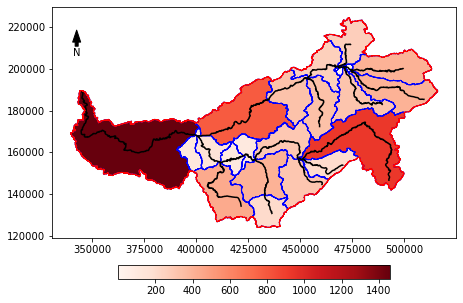

In [13]:
fig, axm=plt.subplots(figsize=(15,5))

basin.plot(ax=axm, facecolor='None', edgecolor='red', zorder=2, label='Basin')
river.plot(ax=axm , color='black', zorder=1, label='river')
sub.plot(ax=axm, edgecolor='blue', zorder=0, column='Area', cmap='Reds' , label='subbasins')

#Add North arrow in the map


axm.annotate('N', xy=(0.06,0.9), xytext=(0.06, 0.8),
        arrowprops=dict(facecolor='black', width=3, headwidth=8),
        ha='center', va='center', fontsize=10,
        xycoords=axm.transAxes)

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=sub.Area.min(), vmax=sub.Area.max()))  

sm._A = []
cbar=fig.colorbar(sm,orientation='horizontal',fraction=0.05,pad=0.1,ax=axm, format="%0.0f")




In [18]:
sub['Area']

0        1.720683
1      272.220584
2       13.526969
3       10.464338
4      409.932312
5      264.481291
6      411.579935
7      337.518355
8      326.212571
9      339.016500
10     118.937055
11     792.061615
12       2.073385
13     309.145144
14     931.765271
15     107.234060
16     160.490411
17     104.550165
18     206.388722
19     311.858431
20     407.592721
21     444.939684
22     209.498379
23    1459.689093
Name: Area, dtype: float64

<AxesSubplot:>

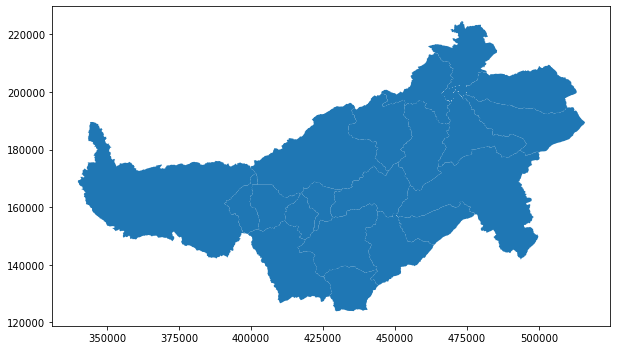

In [63]:
sub.plot(figsize=(10,10))

Text(0.5, 1.0, 'River network')

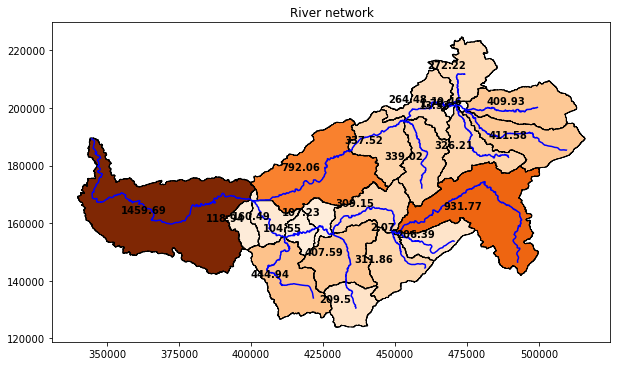

In [115]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10,10))

# plot shapefile


# sub.plot(ax=ax, column = 'Area', cmap = 'Greens', edgecolor="black", legend = True)
river.plot(ax=ax, color='blue')

#outlets.plot(ax=ax, color='black', marker="*", markersize=100)
sub.plot(ax=ax,edgecolor='black', column='Area', cmap="Oranges",)


# Insert labels. Here you can put the number of subbasin as a label and plot it using lambda
sub.apply(lambda x: ax.annotate(text=round(x.Area, 2), xy=x.geometry.centroid.coords[0],
                                              ha='right', va='bottom', fontsize=10,fontweight ='bold'),axis=1)



# add labels and a title
ax.set_title('River network')




The Coordinate Reference System or CRS of a spatial object tells Python where the raster is located in geographic space. It also tells Python what mathematical method should be used to “flatten” or project the raster in geographic space.

***The same location but saved in different coordinate references systems will not line up in any GIS or other program***



**difference between proj4 and CRS**

A Coordinate Reference System (CRS) is a set of parameters that defines how the coordinates of a geographic dataset (such as a shapefile or a raster image) are related to the surface of the earth. It defines the projection, datum, and units used to represent the geographic data. A CRS is usually identified by an EPSG code, which is a unique identifier for a CRS.

The Proj4 notation, or proj4 string, is a text representation of a CRS that is used by the proj library, and it is similar to the WKT (Well-Known Text) notation. The proj4 notation is a string that contains a set of parameters that define the CRS, such as the projection method, the datum, the semi-major and semi-minor axis of the ellipsoid, and the central meridian and standard parallel of the projection.

The main difference between the two is that CRS is the fundamental concept that defines the structure of a coordinate system, it helps to establish the relationship between a point on a map and its real-world coordinates. While proj4 notation is a string representation of the CRS that is mainly used as an input format for various GIS software and libraries.

In simple terms, CRS is the theoretical concept that defines how to map the earth on a flat surface, while proj4 notation is a way to represent that concept in a text format that can be understood and used by software.

In summary, CRS and proj4 notation are different ways to represent the same thing: a coordinate system. But CRS is a broader concept that includes the mathematical and geometric details of a coordinate system, while proj4 notation is a specific format used to represent a CRS in a computer-readable form.


 
You can view the CRS string associated with your Python object using the crs

In [86]:
# Get CRS for DC shapefile
river.crs

{'proj': 'lcc',
 'lat_1': 33.3,
 'lat_0': 33.3,
 'lon_0': -5.4,
 'k_0': 0.999625769,
 'x_0': 500000,
 'y_0': 300000,
 'a': 6378249.2,
 'b': 6356515,
 'units': 'm',
 'no_defs': True}

It looks like the coordinate reference system (CRS) information provided is in the Proj4 format. This format includes parameters such as projection method, latitude and longitude of the origin, scale factor, and more. In this case, it appears to be a Lambert Conformal Conic (lcc) projection.

ere's a breakdown of the parameters in the provided CRS:

'proj': 'lcc': Lambert Conformal Conic projection.

'lat_1': 33.3: First standard parallel.

'lat_0': 33.3: Latitude of origin.

'lon_0': -5.4: Longitude of origin.

'k_0': 0.999625769: Scale factor at origin.

'x_0': 500000: False Easting.

'y_0': 300000: False Northing.

'a': 6378249.2: Semi-major axis of the ellipsoid.

'b': 6356515: Semi-minor axis of the ellipsoid.

'units': 'm': Units of measurement (meters in this case).

'no_defs': True: No default CRS definition is associated with this CRS.


Transforming the geometry (coordinates) of a GeoDataFrame called data from its current Coordinate Reference System (CRS) to the EPSG 4326 CRS, which is the WGS84 geographic coordinate system.

EPSG stands for "European Petroleum Survey Group," which was an organization that originally defined a set of standards for cartography, geodesy, and related fields. for more details about EPSG please refer to : https://epsg.io/

In other words, it's reprojecting the data to a different coordinate system. WGS84 is commonly used for latitude and longitude coordinates, and an EPSG code of 4326 specifically refers to this coordinate reference system.

In [87]:
geo_river = river.to_crs('epsg:4326')




The EPSG code 4326 refers to the World Geodetic System of 1984 (WGS 84). WGS 84 is a standard coordinate reference system for Earth, widely used for mapping and navigation. Here are some key details about EPSG:4326:

Name: WGS 84
Coordinate System: Geographic
Datum: World Geodetic System of 1984
Projection: None (latitude and longitude coordinates)
Units: Degrees (angular measurement)
In more technical terms, EPSG:4326 is a geographic coordinate system defined by the World Geodetic System (WGS). It uses a three-dimensional Cartesian coordinate system (X, Y, Z) to represent locations on the Earth's surface. The X and Y coordinates are typically expressed in degrees of longitude and latitude.

In [93]:
geo_river.crs

'epsg:4326'

In [97]:
import pyproj

# Define the EPSG code for the CRS you're interested in
epsg_code = 4326

# Create a PyProj CRS object
pyproj.CRS.from_epsg(epsg_code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

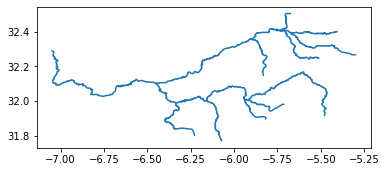

In [98]:
geo_river.plot()

you can use the rasterio library to import a raster from a geodatabase (.mdb file) in Python. Here is an example of how to do this:

In [16]:
import rasterio

# Open the raster file
dem=rasterio.open("SHP/dem.tif")
import rasterio.plot

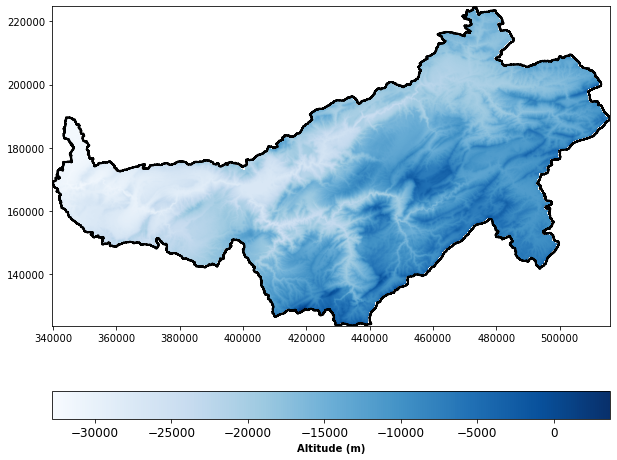

In [17]:


fig, ax=plt.subplots(figsize=(10,8))
# You can use the rasterio.plot.show function to display the raster.
rasterio.plot.show(dem, ax=ax, cmap='Blues')


basin.plot(ax=ax, facecolor='None', edgecolor='Black', linewidth=2)


sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin= dem.read(1).min(), vmax= dem.read(1).max()))
sm._A = []


cbar=fig.colorbar(sm,orientation='horizontal',fraction=0.1,ax=ax) 
cbar.ax.tick_params(labelsize=12)


# Label the colorbar
cbar.set_label("Altitude (m)", fontsize=10, y=1, fontweight ='bold')

You can use the rasterio library to read the value of a specific pixel in a raster in Python. You can also use the index() method to get the row and col of the pixel, it will return the indices of the pixel for a given x, y coordinate. Here is an example of how to do this:

In [18]:

x=1
y=3

In [19]:

x, y=(1, 3)


In [119]:
# Enter the coordinates (X and Y) for the pixel

x=1
y=3

x, y=(1, 2)




x=440000
y = 140000
# Read the value of the pixel using the index() method
col, row= dem.index(440000,140000)
value=dem.read(1)[col, row]
value

2240

# Multidimensional data : NetCDF

In [28]:
import xarray as xr

GLEAM_evap = xr.open_dataset("netCDF/E_2003-2021_GLEAM_v3.6b_MO.nc")
GLEAM_moist= xr.open_dataset("netCDF/SMsurf_2003-2021_GLEAM_v3.6b_MO.nc")
MODIS_evap = xr.open_dataset("netCDF/MOD16A2GF.006_500m_aid0001.nc")

In [21]:
import xarray as xr

evapt=xr.open_dataset("netCDF/E_2003-2021_GLEAM_v3.6b_MO.nc")

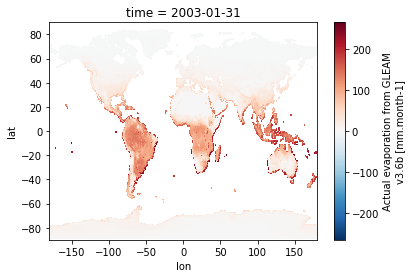

In [26]:
evapt.sel(time="2003-01-31")['E'].plot()

In [121]:
MODIS_evap

<xarray.Dataset>
Dimensions:     (lat: 232, lon: 460, time: 1012)
Coordinates:
  * time        (time) object 2000-01-01 00:00:00 ... 2021-12-27 00:00:00
  * lat         (lat) float64 32.66 32.65 32.65 32.64 ... 31.71 31.7 31.7 31.69
  * lon         (lon) float64 -7.11 -7.106 -7.102 ... -5.206 -5.202 -5.198
Data variables:
    crs         int8 ...
    ET_500m     (time, lat, lon) float32 ...
    ET_QC_500m  (time, lat, lon) float32 ...
Attributes:
    title:        MOD16A2GF.006 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.14
    references:   See README.md
    history:      See README.md

In [122]:
# Select one day from the data using sel
selected_day = MODIS_evap.sel(time='2000-01-01 00:00:00')
selected_day['ET_500m']

<xarray.DataArray 'ET_500m' (time: 1, lat: 232, lon: 460)>
[106720 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-01-01 00:00:00
  * lat      (lat) float64 32.66 32.65 32.65 32.64 ... 31.71 31.7 31.7 31.69
  * lon      (lon) float64 -7.11 -7.106 -7.102 -7.098 ... -5.206 -5.202 -5.198
Attributes:
    grid_mapping:      crs
    valid_min:         -32767
    valid_max:         32700
    long_name:         MODIS Gridded 500m 8-day Composite Evapotranspiration ...
    units:             kg/m^2/8day
    scale_factor_err:  0.0
    add_offset_err:    0.0
    calibrated_nt:     22

<AxesSubplot:title={'center':'time = 2000-01-01 00:00:00'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

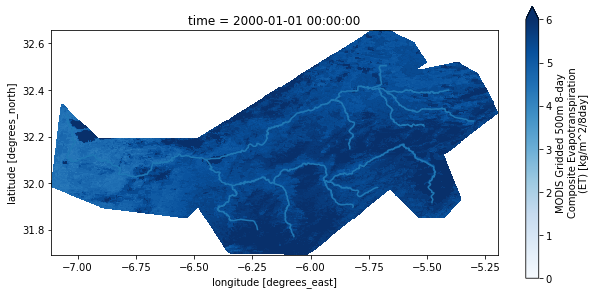

In [132]:
fig, ax = plt.subplots(figsize=(10,5))

selected_day['ET_500m'].plot(ax=ax, zorder=0, cmap='Blues',vmin=0, vmax=6)
geo_river.plot(ax=ax, zorder=1)



In [166]:
GLEAM_evap.time.max()

<xarray.DataArray 'time' ()>
array('2021-12-31T00:00:00.000000000', dtype='datetime64[ns]')

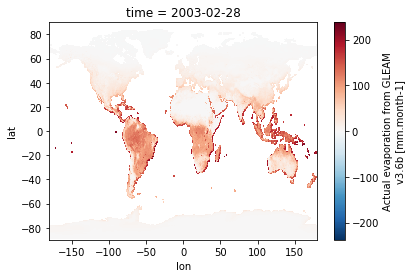

In [137]:

# Select one day from the data using sel
selected_day = GLEAM_evap.sel(time='2003-02-28T00:00:00.000000000')

selected_day['E'].plot()




(31.70867049337827, 32.6204762745008)

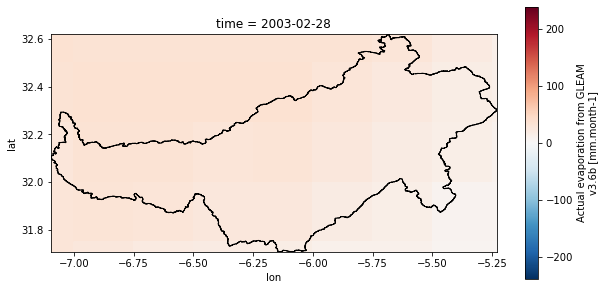

In [145]:
fig, ax = plt.subplots(figsize=(10,5))


selected_day['E'].plot(ax=ax)

basin_g = basin.to_crs('epsg:4326')


basin_g.plot(ax=ax, zorder=1, facecolor='None', edgecolor='black')

# reframe the display of the map 

xlim = ([basin_g.total_bounds[0],  basin_g.total_bounds[2]])
ylim = ([basin_g.total_bounds[1],  basin_g.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

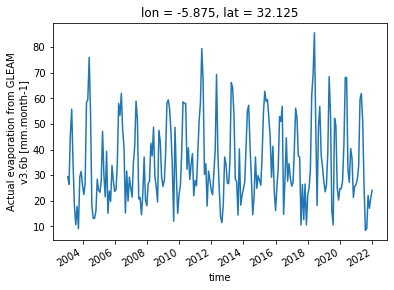

In [32]:
# Enter the coordinates (X and Y) for the pixel
lat, lon = (32, -6)
# Read the value of the pixel using the index() method
GLEAM_evap.sel(lat=32,lon=-6,method='nearest')['E'].plot()

In [161]:
df_ev=pd.DataFrame(GLEAM_evap.sel(lat=lat,lon=lon,method='nearest')['E'], columns=['Evapo'])
df_ev

,Evapo
0,29.400501
1,26.469826
2,45.918396
3,55.812321
4,34.809486
...,...
223,9.164827
224,22.020044
225,17.078245
226,21.130362


In [169]:
from datetime import datetime
dates=[d.to_pydatetime() for d in pd.date_range(datetime(2003,1,31), datetime(2021, 12, 31), freq="M").tolist()]

In [173]:
df_ev.index=dates
df_ev

,Evapo
2003-01-31,29.400501
2003-02-28,26.469826
2003-03-31,45.918396
2003-04-30,55.812321
2003-05-31,34.809486
...,...
2021-08-31,9.164827
2021-09-30,22.020044
2021-10-31,17.078245
2021-11-30,21.130362


In [174]:
df_ev.to_excel(r'Evap.xlsx')